1) aisles.csv         : aisle_id, aisle
    - 소분류
    
2) departments.csv    : department_id, department
    - 대분류
    
2) order_products.csv : order_id, product_id, add_to_cart_order, reordered : train, prior
    - 주문id, 상품 id, 장바구니에 담긴 순서, 재구매 여부
    
3) orders.csv         : order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, day_since
    - 주문 id, 사용자 id, 데이터 구분, 주문 수량, 주문 요일, 주문 시간, 재구매까지 걸린 시간
    
4) products.csv       : product_id, product_name, aisle_id, department_id
    - 상품 id, 상품 이름, 소분류 id, 대분류 id
    
> 내가 이 상품을 살것인가 추천하는 기준? 재구매가 몇번이상인지, 재구매까지 걸린 기간이 짧음

> 그 외 추천 : 내가 사는 물건이랑 같은 소분류안에 있는 것, 내가 사는 물건과 겹치는 게 많은 사용자의 구매목록에서 내가 사지 않은 것


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
# data

train = pd.read_csv("order_products__train.csv")
prior = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")
submit = pd.read_csv("sample_submission.csv")


In [4]:
submit

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
5,313,39276 29259
6,353,39276 29259
7,386,39276 29259
8,414,39276 29259
9,418,39276 29259


In [5]:
# check orders.csv
# 확인할만큼 괄호에 숫자 넣기 (default = 5)

orders_df.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [8]:
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [9]:
prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [11]:
# check order_products__train.csv
# 주문된 상품에 관한 정보

train.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [12]:
# 데이터 분류
# eval_set이 기준 : 총 3개로 나뉘고 그 3개의 덩어리안에 데이터가 몇개씩 있는지 확인

cnt_srs = orders_df.eval_set.value_counts()
print (cnt_srs)

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


In [13]:
def get_unique_count(x):
    return len(np.unique(x))

# eval_set이 같은 것끼리 그룹화
cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)

print (cnt_srs)

#총 206209명의 고객들이 있음

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64


In [14]:
#order number 중복 있음 : 유니크한 값 아니고 단지 "구매 횟수" 라는 것을 확인

cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs

# userid - ordernumber
cnt_srs = cnt_srs.order_number.value_counts()
cnt_srs

4      23986
5      19590
6      16165
7      13850
8      11700
9      10190
10      9032
11      7815
12      6952
13      6236
14      5613
15      5191
16      4593
17      4139
18      3836
19      3390
20      3200
21      2921
22      2706
23      2605
24      2288
25      2186
26      2060
27      1908
28      1779
29      1601
30      1494
31      1474
32      1386
100     1374
       ...  
70       178
72       166
74       162
75       162
71       154
73       138
76       134
78       127
79       127
77       120
82       119
80       116
81       108
85       100
84        99
86        93
83        86
90        85
88        79
87        78
89        77
92        69
93        67
96        67
95        64
94        57
91        56
97        54
98        50
99        47
Name: order_number, Length: 97, dtype: int64

In [15]:
# 요일 기준 : 요일당 주문 건수

cnt_day = orders_df.order_dow.value_counts()
print (cnt_day)

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64


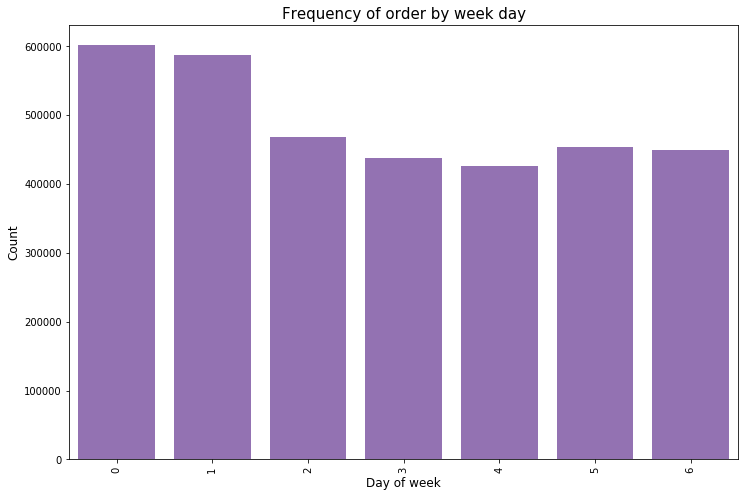

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[4])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

In [17]:
# 물건이 제일 많이 주문된 시간은 언제? 

cnt_hour = orders_df.order_hour_of_day.value_counts()
print (cnt_hour)

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64


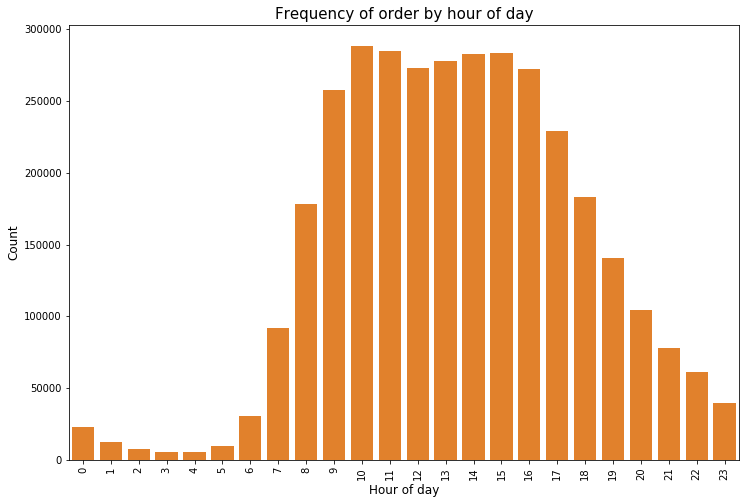

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

In [19]:
# 요일마다 어떤 시간에 제일 주문건수가 많은가?? 

grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
print (grouped_df)

     order_dow  order_hour_of_day  order_number
0            0                  0          3936
1            0                  1          2398
2            0                  2          1409
3            0                  3           963
4            0                  4           813
5            0                  5          1168
6            0                  6          3329
7            0                  7         12410
8            0                  8         28108
9            0                  9         40798
10           0                 10         48465
11           0                 11         51035
12           0                 12         51443
13           0                 13         53849
14           0                 14         54552
15           0                 15         53954
16           0                 16         49463
17           0                 17         39753
18           0                 18         29572
19           0                 19       

In [20]:
# 재구매까지 걸리는 시간별 구매량 
# 30일이 제일 많고 26일이 제일 적음

cnt_prior_order = orders_df.days_since_prior_order.value_counts()
print (cnt_prior_order)

30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [22]:
# 학습데이터 확인 > orders 랑 똑같음

train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [23]:
# summary : reorder 가 횟수가 아니라 맞다, 아니다뿐이라 별 도움이 안 됨ㅎ... > 각 상품마다 재구매 기간의 평균을 구해보까..?

pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1384617.000,1384617.000,1384617.000,1384617.000
mean,1706297.621,25556.236,8.758,0.599
std,989732.649,14121.272,7.424,0.490
min,1.000,1.000,1.000,0.000
25%,843370.000,13380.000,3.000,0.000
50%,1701880.000,25298.000,7.000,1.000
75%,2568023.000,37940.000,12.000,1.000
max,3421070.000,49688.000,80.000,1.000
